# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [41]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import sys
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#np.set_printoptions(threshold=sys.maxsize)

from HANKmodel import HANKModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [117]:
#print(model)
model = HANKModelClass(name='baseline')

# Step 1: Steady state

In [118]:
model.find_ss(do_print=True)

Z_N 	=1.0234, Z_L =  1.0 Q = 0.5 M_N = 0.13189923548354854 M_L = 0.23312620206007845 beta =  0.9875 N_N = 0.6394872021647909 N_L = 0.26950706398915447
Z_N 	=1.0234, Z_L =  1.0 Q = 0.5 M_N = 0.13189923548354854 M_L = 0.23312620206007845 beta =  0.9875 N_N = 0.6394872021647909 N_L = 0.26950706398915447
Z_N 	=1.0234, Z_L =  1.0 Q = 0.5 M_N = 0.13189923548354854 M_L = 0.23312620206007845 beta =  0.9875 N_N = 0.6394872021647909 N_L = 0.26950706398915447
Z_N 	=1.0234, Z_L =  1.0 Q = 0.5 M_N = 0.13189923482839797 M_L = 0.23312620553392957 beta =  0.9875 N_N = 0.6394871989884237 N_L = 0.2695070680051227
Z_N 	=1.0234, Z_L =  1.0 Q = 0.5 M_N = 0.13189923548354854 M_L = 0.23312620206007845 beta =  0.9875000147148967 N_N = 0.6394872021647909 N_L = 0.26950706398915447
Z_N 	=1.0234, Z_L =  1.0 Q = 0.5000000074505806 M_N = 0.13189923482839797 M_L = 0.23312620206007845 beta =  0.9875 N_N = 0.639487189459322 N_L = 0.26950706398915447
Z_N 	=0.9951, Z_L =  1.0 Q = 0.4861501582961208 M_N = 0.0538148166947

In [119]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.5 secs [785 iterations]


In [120]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [121]:
ss.w_N/(ss.ELL_hh**(par.nu)*((ss.C**par.sigma)*ss.C_HAT_N_hh/par.alpha_hh)**(1/par.gamma_hh))
#par.varphi
#
# 
# 
# ss.ELL_hh**(-par.nu)*((ss.C**par.sigma)*ss.C_HAT_N_hh/par.alpha_hh)**(-1/par.gamma_hh)*((par.mu_L**(par.gamma_L-1)-par.alpha_L*ss.pm**(1-par.gamma_L))/(1-par.alpha_L))**(1/(1-par.gamma_L))*ss.Q*ss.Z_L


#first_bracket = (((ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)*ss.ELL_hh**(-par.nu))/ss.Z_N)
#second_bracket = ((par.mu_N**(par.gamma_N-1)-par.alpha_N*ss.pm**(1-par.gamma_N))/(1-par.alpha_N))**(1/(1-par.gamma_N))
#print(first_bracket, second_bracket)
#(ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)

#((par.mu_N**(par.gamma_N-1)-par.alpha_N*ss.pm**(1-par.gamma_N))/(1-par.alpha_N))**(1/(1-par.gamma_N))*(((ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)*ss.ELL_hh**(-par.nu))/ss.Z_N)

7.684014359643545

In [107]:
print("steady state consumption C_hh", ss.C_hh,"C_Lhh", ss.C_L_hh,"C_Nhh", ss.C_N_hh)
print("steady state consumption C", ss.C,"C_L", ss.C_L,"C_N", ss.C_N)
print("steaty state production Y", ss.Y,"Y_L", ss.Y_L,"Y_N", ss.Y_N)
print(ss.Q*ss.Y_L + ss.Y_N) 
print(ss.C_L*ss.Q + ss.C_N + (ss.M_L+ss.M_N)*ss.pm)

steady state consumption C_hh 0.6063876925654095 C_Lhh 0.37870728546204296 C_Nhh 0.2527883741658281
steady state consumption C 0.6063876932548824 C_L 0.3787072854620876 C_N 0.22768040779279475
steaty state production Y 1.0 Y_L 1.624321618994193 Y_N 0.27626612948486506
1.0
1.2193681593492154


In [109]:
print("Steady state W_L, W_N, Q = ", ss.w_L, ss.w_N, ss.Q)
print("Steady state B, G, A, A_HH, tau = ", ss.B, ss.G, ss.A, ss.A_hh, ss.tau)
#print("Steady state interest rate", ss.r)
print("steady state consumption C_hh", ss.C_hh,"C_Lhh", ss.C_L_hh,"C_Nhh", ss.C_N_hh)
print("Steady state laborsupply ell ", ss.c)
print("varphi= ", par.varphi, "beta = ", par.beta)
print(ss.N_N, ss.Y_N, ss.N_L, ss.Y_L)

Steady state W_L, W_N, Q =  0.8225132793812668 0.3664795889408334 0.445560695647998
Steady state B, G, A, A_HH, tau =  5.6 0.0 5.6 5.600000000000064 0.0
steady state consumption C_hh 0.6063876925654095 C_Lhh 0.37870728546204296 C_Nhh 0.2527883741658281
Steady state laborsupply ell  [[[0.20969089 0.21142743 0.21319733 ... 1.28306982 1.2907575  1.29851231]
  [0.28929436 0.29105231 0.29284056 ... 1.30364941 1.31123335 1.31888486]
  [0.39976944 0.40134947 0.40219881 ... 1.32837073 1.33583207 1.34336166]
  ...
  [0.63848668 0.63854295 0.63859986 ... 1.39628651 1.40343125 1.41064558]
  [0.75262826 0.75266451 0.75270117 ... 1.44407905 1.45101937 1.45802981]
  [0.87293593 0.87296289 0.87299016 ... 1.50567645 1.51237596 1.51914588]]]
varphi=  0.8 beta =  0.9910148219997901
0.24046967769775449 0.27626612948486506 0.8538355386661313 0.7237338705151349


In [9]:
#ss.c
print(ss.c_L[0,1,:])
#ss.c_L.shape
#ss.C_L_hh
#ss.C_hh

[0.18294676 0.18403763 0.18514702 0.18621729 0.18679067 0.18737075
 0.18795678 0.18854617 0.18913369 0.1896434  0.19006339 0.19048249
 0.19090624 0.19133426 0.19176594 0.19219913 0.19261334 0.19299935
 0.19335081 0.19370216 0.19405535 0.19441201 0.1947723  0.19513577
 0.19550083 0.1958567  0.19619791 0.19652138 0.19684007 0.19716008
 0.19748206 0.19780651 0.19813417 0.1984649  0.19879782 0.1991253
 0.1994445  0.19975317 0.20005775 0.20036281 0.20066968 0.20097863
 0.20128991 0.2016039  0.20192064 0.20223769 0.20255095 0.20285841
 0.20316006 0.20346015 0.20376144 0.20406471 0.2043701  0.20467773
 0.20498776 0.20530008 0.20561296 0.20592341 0.20622989 0.20653255
 0.20683471 0.20713848 0.20744438 0.20775249 0.20806289 0.20837559
 0.20869032 0.20900561 0.20931927 0.20963016 0.20993865 0.21024746
 0.21055823 0.21087134 0.21118681 0.21150463 0.21182476 0.21214665
 0.21246879 0.21278955 0.21310842 0.21342635 0.21374549 0.21406694
 0.21439094 0.21471745 0.21504643 0.21537758 0.21570997 0.21604

## Policy functions

In [10]:
#fig = plt.figure(figsize=(18,4),dpi=100)
#a_max = 500
#
## a. consumption
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,1)
#ax.set_title(f'consumption')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.legend(frameon=True)
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('consumption, $c_t$')
#
## b. saving
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,2)
#ax.set_title(f'saving')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('savings, $a_{t}$')
#
## c. labor supply
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,3)
#ax.set_title(f'labor_supply')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('labor supply, $n_{t}$')
#
#fig.tight_layout()

## Simulation

In [11]:
#fig = plt.figure(figsize=(12,4),dpi=100)
#
## a. income
#ax = fig.add_subplot(1,2,1)
#ax.set_title('productivity')
#
#y = np.cumsum(np.sum(ss.D[0],axis=1))
#ax.plot(par.z_grid,y/y[-1])
#
#ax.set_xlabel('productivity, $z_{t}$')
#ax.set_ylabel('CDF')
#
## b. assets
#ax = fig.add_subplot(1,2,2)
#ax.set_title('savings')
#y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
#ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
#        
#ax.set_xlabel('assets, $a_{t}$')
#ax.set_ylabel('CDF')
#ax.set_xscale('symlog')


# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.9 secs
household problem simulated along transition in 2.4 secs



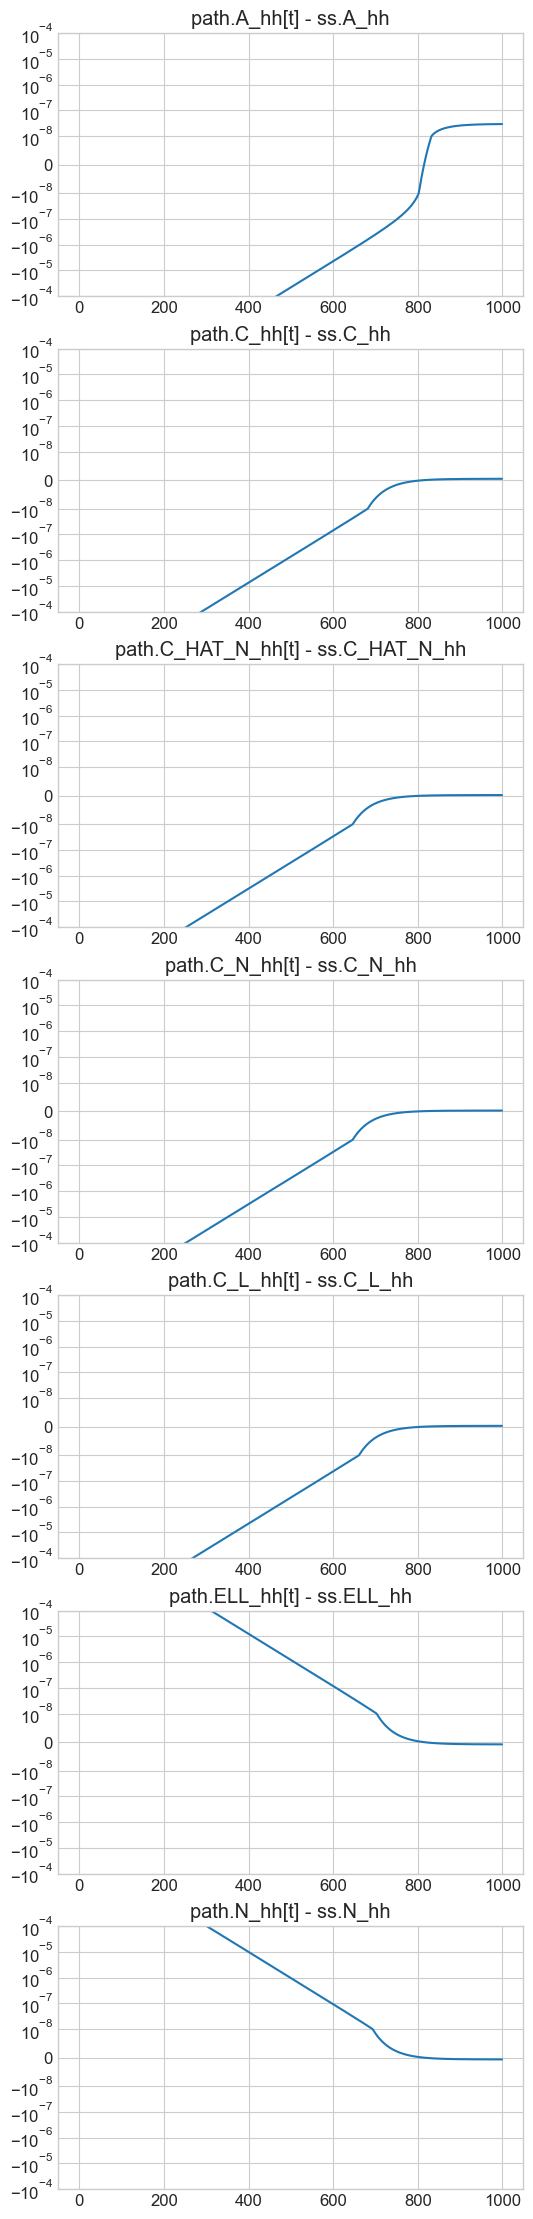

In [12]:
model.test_hh_path()

**Full transition path:**

In [14]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors



ZeroDivisionError: division by zero

In [ ]:
model.test_jacs(s_list=[50,100,150])

# Step 3a: Find non-linear transition path

## Find transition path

In [ ]:
par.jump_pm = 0.10/4
model.find_transition_path(do_print=True)

## Plot transitions

In [ ]:
paths = ['i','pi_L','pi_N','r','C_N']
lvl_value = ['i','pi_L','pi_N','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

# Step 3b: Find linearized IRFs

In [ ]:
model.find_IRFs(do_print=True)

In [ ]:
paths = ['C']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

# Step 4. Simulation

In [ ]:
np.random.seed(1917)
model.simulate(do_print=True)

In [ ]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

In [ ]:
model_sim()